In [1]:
import pandas as pd
import numpy as np
import csv
import time
from datetime import datetime

In [2]:
g=open('C:/Users/jiang/Desktop/课件/案例五/arima.csv',encoding='utf-8')
data=pd.read_csv(g)
g.close()

In [3]:
data.head()

,日期,销量
0,20018/1/1,589
1,20018/1/2,561
2,20018/1/3,640
3,20018/1/4,656
4,20018/1/5,727


In [4]:
data.isnull().any()

日期    False
销量    False
dtype: bool

In [5]:
len(data)

168

In [6]:
train=data[0:163]
test=data[163:168]

In [21]:
test

,日期,销量
163,20018/6/13,858
164,20018/6/14,817
165,20018/6/15,827
166,20018/6/16,797
167,20018/6/17,843


In [7]:
train.set_index(['日期'], inplace=True)

In [23]:
len(train)

163

In [8]:
train.dtypes

销量    int64
dtype: object

In [9]:
train.head()

,销量
日期,
20018/1/1,589
20018/1/2,561
20018/1/3,640
20018/1/4,656
20018/1/5,727


In [10]:
train.index

Index(['20018/1/1', '20018/1/2', '20018/1/3', '20018/1/4', '20018/1/5',
       '20018/1/6', '20018/1/7', '20018/1/8', '20018/1/9', '20018/1/10',
       ...
       '20018/6/3', '20018/6/4', '20018/6/5', '20018/6/6', '20018/6/7',
       '20018/6/8', '20018/6/9', '20018/6/10', '20018/6/11', '20018/6/12'],
      dtype='object', name='日期', length=163)

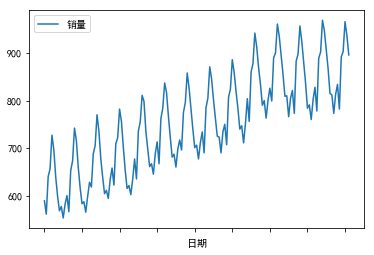

In [12]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
train.plot()
plt.show()

E:\anaconda\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


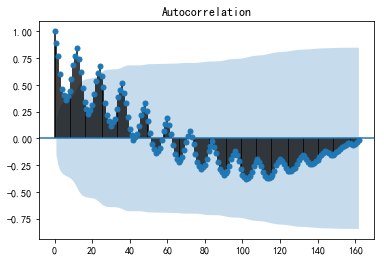

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(train).show()

In [15]:
from statsmodels.tsa.stattools import adfuller as ADF
print('原始序列的ADF检验结果为：',ADF(train['销量']))
#返回值依次为adf、pvalue、usedlag、nobs、critical values、icbest、regresults、resstore

原始序列的ADF检验结果为： (-1.7710319547121214, 0.39493537274197843, 13, 149, {'1%': -3.4750180242954167, '5%': -2.8811408028842043, '10%': -2.577221358046935}, 1076.6322847133642)


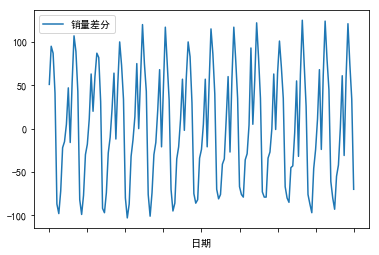

In [25]:
D_data = train.diff(2).dropna()
D_data.columns = ['销量差分']
D_data.plot() #时序图
plt.show()

E:\anaconda\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


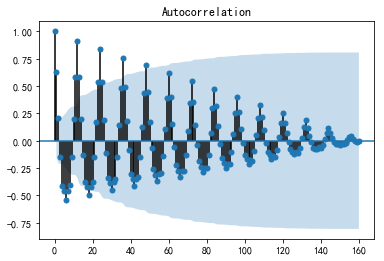

In [26]:
plot_acf(D_data).show()

E:\anaconda\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


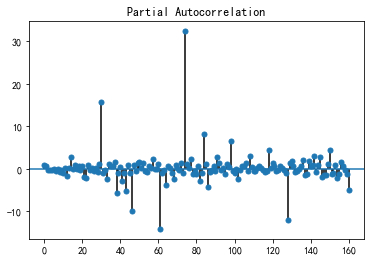

In [28]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(D_data).show()

In [22]:
print(u'差分序列的ADF检验结果为：', ADF(D_data[u'销量差分']))

差分序列的ADF检验结果为： (-2.250896266100072, 0.18829399181292195, 12, 149, {'1%': -3.4750180242954167, '5%': -2.8811408028842043, '10%': -2.577221358046935}, 1071.2704073650596)


In [ ]:
白噪声检验

In [23]:
#取消科学计数法
np.set_printoptions(suppress=True, threshold=np.nan)

In [29]:
from statsmodels.stats.diagnostic import acorr_ljungbox
print(u'差分序列的白噪声检验结果为：', acorr_ljungbox(D_data, lags=1)) #返回统计量和p值

差分序列的白噪声检验结果为： (array([65.28096961]), array([0.]))


In [61]:
from statsmodels.tsa.arima_model import ARIMA

train['销量'] = train['销量'].astype(float)
#定阶
pmax = int(len(D_data)/20) 
qmax = int(len(D_data)/20) 
bic_matrix = [] #bic矩阵
for p in range(pmax+1):
    tmp = []
    for q in range(qmax+1):
        try: #存在部分报错，所以用try来跳过报错。
            tmp.append(ARIMA(train, (p,2,q)).fit().bic)
        except:
            tmp.append(None)
    bic_matrix.append(tmp)

bic_matrix = pd.DataFrame(bic_matrix) #从中可以找出最小值

p,q = bic_matrix.stack().idxmin() #先用stack展平，然后用idxmin找出最小值位置。
print(u'BIC最小的p值和q值为：%s、%s' %(p,q)) 

E:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignore

E:\anaconda\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. fo

E:\anaconda\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E:\anaconda\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E

E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E:\anaconda\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. fo

E:\anaconda\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
E:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', Valu

BIC最小的p值和q值为：8、8


E:\anaconda\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
E:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [62]:
model = ARIMA(train, (8,2,8)).fit() 
model.summary2() #给出一份模型报告

E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E:\anaconda\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
E:\anaconda\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
E:\anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:1455: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
E:\anaconda\lib\site-packages\scipy\stats\_dis

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: ARIMA
===================================================================
Model:              ARIMA            BIC:                 1491.5133
Dependent Variable: D2.销量            Log-Likelihood:      -700.02  
Date:               2020-05-30 09:03 Scale:               1.0000   
No. Observations:   161              Method:              css-mle  
Df Model:           17               Sample:              2        
Df Residuals:       144                                   3        
Converged:          0.0000           S.D. of innovations: 16.661   
No. Iterations:     30.0000          HQIC:                1458.569 
AIC:                1436.0480                                      
--------------------------------------------------------------------
                Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
--------------------------------------------------------------------
const          -0.0094    0.1059   -0.0888  0.9294  -0.2169   0.1981
ar.L1.D2.销量    -0.1932    0.0500   -3.8684  0.0002  -0.2911  -0.0953
ar.L2.D2.销量    -0.0671       nan       nan     nan      nan      nan
ar.L3.D2.销量     0.1767    0.0166   10.6536  0.0000   0.1442   0.2092
ar.L4.D2.销量    -0.7384    0.0290  -25.4933  0.0000  -0.7952  -0.6816
ar.L5.D2.销量    -0.1806    0.0317   -5.6997  0.0000  -0.2427  -0.1185
ar.L6.D2.销量    -0.2197    0.0327   -6.7263  0.0000  -0.2837  -0.1556
ar.L7.D2.销量    -0.0786       nan       nan     nan      nan      nan
ar.L8.D2.销量    -0.7733       nan       nan     nan      nan      nan
ma.L1.D2.销量    -1.1356    0.0677  -16.7711  0.0000  -1.2683  -1.0029
ma.L2.D2.销量     0.0187    0.1153    0.1621  0.8714  -0.2073   0.2447
ma.L3.D2.销量    -0.6994    0.0740   -9.4463  0.0000  -0.8446  -0.5543
ma.L4.D2.销量     1.9242    0.0685   28.1016  0.0000   1.7900   2.0584
ma.L5.D2.销量    -0.6052    0.1006   -6.0141  0.0000  -0.8024  -0.4080
ma.L6.D2.销量    -0.1689    0.1031   -1.6385  0.1035  -0.3708   0.0331
ma.L7.D2.销量    -0.8706    0.0629  -13.8357  0.0000  -0.9940  -0.7473
ma.L8.D2.销量     0.7810    0.0516   15.1305  0.0000   0.6798   0.8821
----------------------------------------------------------------------------
                Real           Imaginary          Modulus          Frequency
----------------------------------------------------------------------------
AR.1          -0.8858            -0.5104           1.0223            -0.4168
AR.2          -0.8858             0.5104           1.0223             0.4168
AR.3          -0.4981            -0.8708           1.0032            -0.3327
AR.4          -0.4981             0.8708           1.0032             0.3327
AR.5           0.8662            -0.4998           1.0000            -0.0833
AR.6           0.8662             0.4998           1.0000             0.0833
AR.7           0.4669            -1.0056           1.1088            -0.1808
AR.8           0.4669             1.0056           1.1088             0.1808
MA.1          -0.8046            -0.7134           1.0753            -0.3846
MA.2          -0.8046             0.7134           1.0753             0.3846
MA.3          -0.4638            -0.8860           1.0001            -0.3267
MA.4          -0.4638             0.8860           1.0001             0.3267
MA.5           0.8093            -0.5873           1.0000            -0.0999
MA.6           0.8093             0.5873           1.0000             0.0999
MA.7           1.0164            -0.2722           1.0522            -0.0416
MA.8           1.0164             0.2722           1.0522             0.0416
===================================================================

"""

In [63]:
model.forecast(5)

(array([867.25229506, 821.19598968, 834.17474722, 760.37302292,
        782.09193596]),
 array([16.66069011, 20.06563868, 22.0643447 , 22.07623781, 23.01645068]),
 array([[834.59794249, 899.90664764],
        [781.86806053, 860.52391882],
        [790.92942626, 877.42006818],
        [717.10439189, 803.64165395],
        [736.98052158, 827.20335035]]))

In [72]:
test

,日期,销量
163,20018/6/13,858.0
164,20018/6/14,817.0
165,20018/6/15,827.0
166,20018/6/16,797.0
167,20018/6/17,843.0


In [64]:
forecast=model.forecast(5)[0]

In [81]:
test['预测值']=forecast

E:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [74]:
test.head()

,日期,销量,预测值
163,20018/6/13,858.0,867.252295
164,20018/6/14,817.0,821.195990
165,20018/6/15,827.0,834.174747
166,20018/6/16,797.0,760.373023
167,20018/6/17,843.0,782.091936


In [75]:
def mape(x):
    a=x[1]
    b=x[2]
    result=abs(a-b)/a
    return  result

In [82]:
test['MAPE']=test.apply(mape,axis=1)

E:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [83]:
test.head()

,日期,销量,预测值,MAPE
163,20018/6/13,858.0,867.252295,0.010784
164,20018/6/14,817.0,821.195990,0.005136
165,20018/6/15,827.0,834.174747,0.008676
166,20018/6/16,797.0,760.373023,0.045956
167,20018/6/17,843.0,782.091936,0.072252
